In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
sep = os.sep
import torch
%load_ext autoreload
%autoreload 2

In [2]:
os.chdir('/home/ak/PycharmProjects/ature')
from neuralnet.utils.measurements import get_best_f1_thr

In [3]:
train_val = pd.read_csv('net_logs'+sep+'unet-DRIVE.chk.tar.csv', index_col='TYPE')
val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])
train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])
test= pd.read_csv('net_logs'+sep+'unet-DRIVE.chk.tar-TEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

In [4]:
train_val1 = pd.read_csv('net_logs'+sep+'patchnet-DRIVE.chk.tar.csv', index_col='TYPE')
val1 = train_val1.query('TYPE==1')
T_val1 = np.arange(val1.shape[0])
train1 = train_val1.query('TYPE==0')
T_train1 =np.arange(train1.shape[0])
test1= pd.read_csv('net_logs'+sep+'patchnet-DRIVE.chk.tar-TEST.csv', index_col='TYPE')
T_test1 = np.arange(test1.shape[0])

/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Validation Precision-Recall

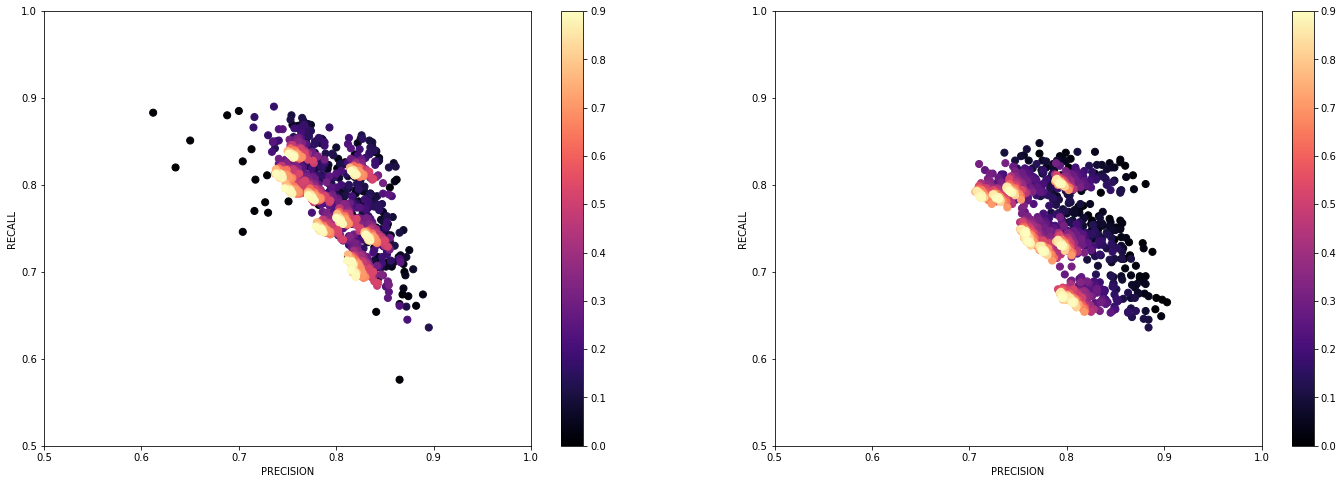

In [5]:
plt.rcParams["figure.figsize"] = [24,8]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, val['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, val1['PRECISION'].shape[0])
plots = val.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = val1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Validation F1 Score

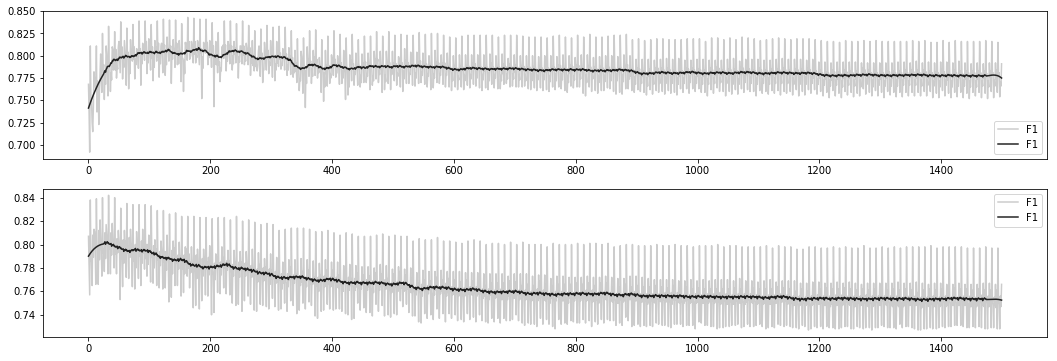

In [6]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['F1'] = savgol_filter(df['F1'], 51, 3)
df1['F1'] = savgol_filter(df1['F1'], 51, 3)
plots = val.plot(y='F1', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='F1', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Validation Accuracy

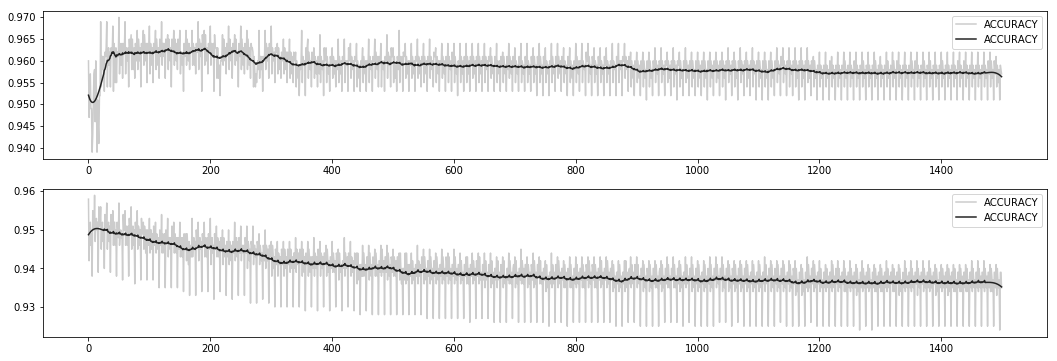

In [7]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = val.plot(y='ACCURACY', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='ACCURACY', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Training F1 Score

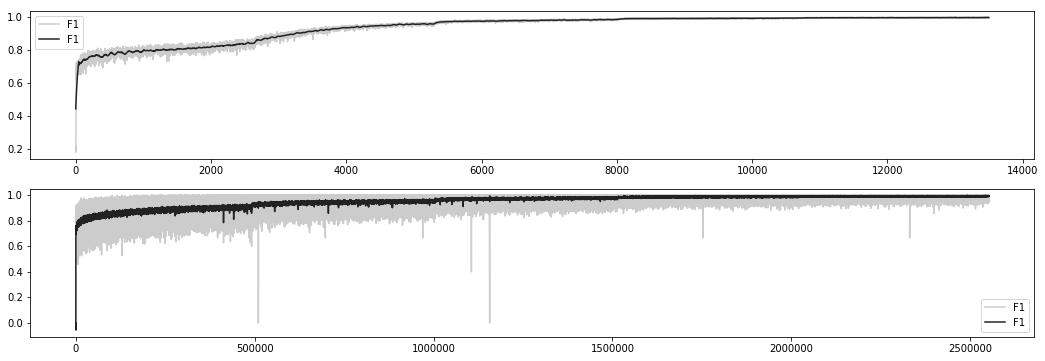

In [8]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
plots = train.plot(y='F1', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='F1', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training precision-recall

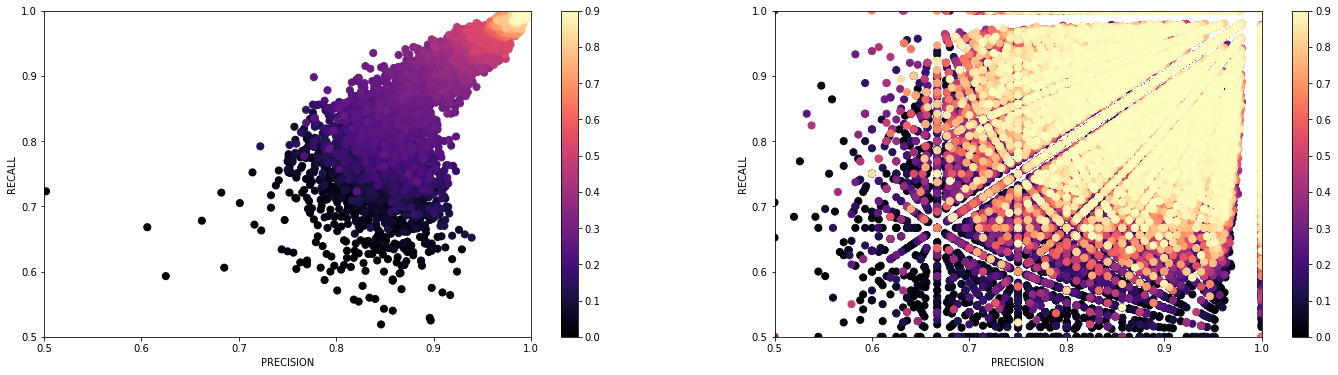

In [11]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, train['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, train1['PRECISION'].shape[0])
plots = train.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = train1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Training loss

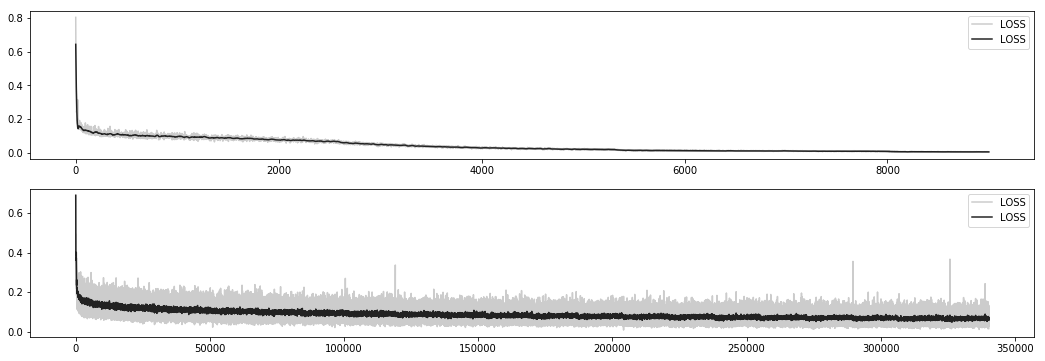

In [12]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['LOSS'] = savgol_filter(df['LOSS'], 51, 3)
df1['LOSS'] = savgol_filter(df1['LOSS'], 51, 3)
plots = train.plot(y='LOSS', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='LOSS', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='LOSS', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='LOSS', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training Accuracy

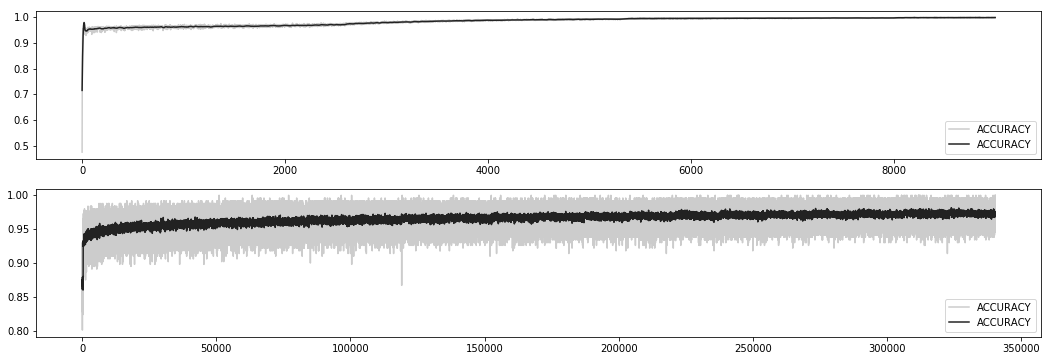

In [13]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = train.plot(y='ACCURACY', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='ACCURACY', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_train1, c='#222222', ax=ax2)
plt.show()

### TEST F1 Score

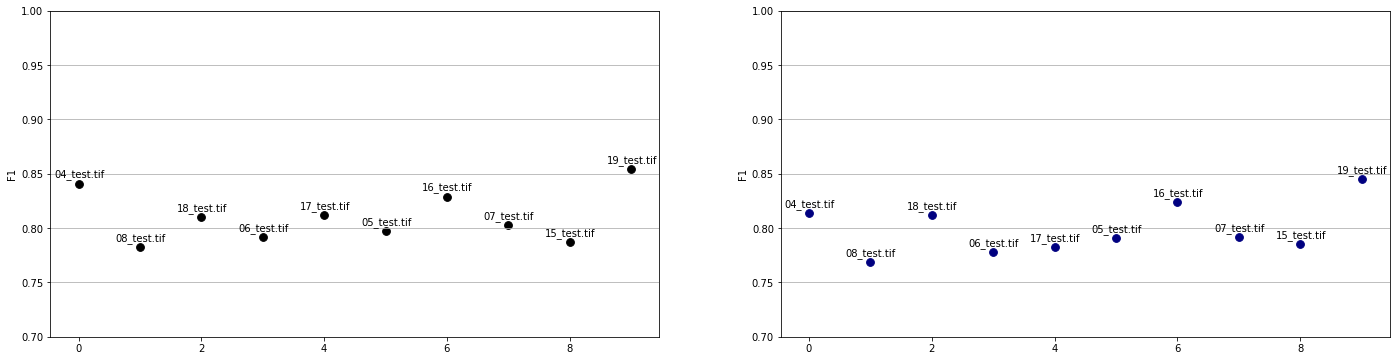

In [9]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['F1'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.4, test['F1'].iloc[i]+0.006))
ax1.set_ylabel('F1')
ax1.set_ylim(0.7, 1)
ax1.grid(True, axis='y')

ax2.scatter(T_test1, test1['F1'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['F1'].iloc[i]), xytext=(T_test1[i]-0.4, test1['F1'].iloc[i]+0.006))
ax2.set_ylabel('F1')
ax2.set_ylim(0.7, 1)
ax2.grid(True, axis='y')

plt.show()

### TEST precision-recall

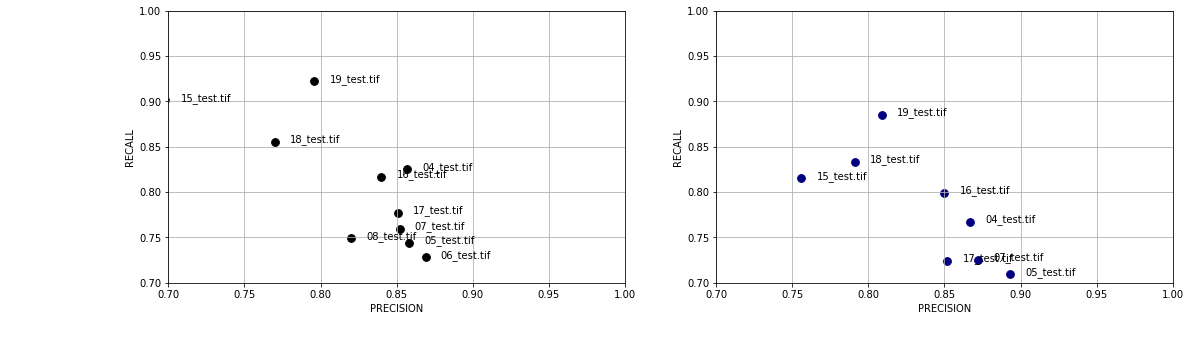

In [10]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test['PRECISION'], test['RECALL'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
ax1.set_xlabel('PRECISION')
ax1.set_ylabel('RECALL')
ax1.set_xlim((0.7, 1))
ax1.set_ylim((0.7, 1))
ax1.grid(True)

ax2.scatter(test1['PRECISION'], test1['RECALL'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (test1['PRECISION'].iloc[i]+0.01, test1['RECALL'].iloc[i]))
ax2.set_xlabel('PRECISION')
ax2.set_ylabel('RECALL')
ax2.set_xlim((0.7, 1))
ax2.set_ylim((0.7, 1))
ax2.grid(True)

plt.show()

### Test Accuracy

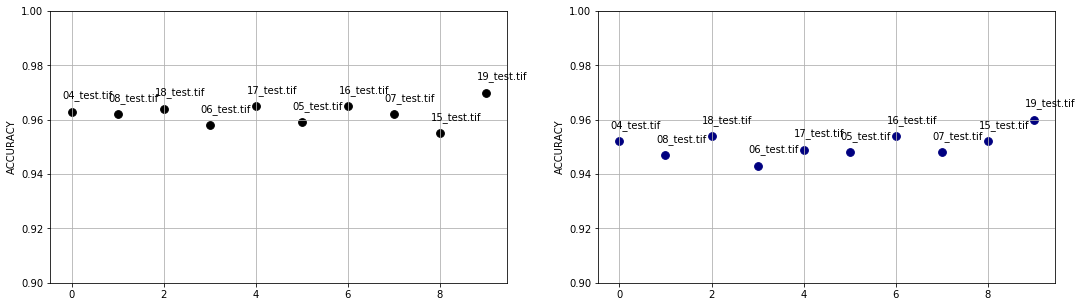

In [11]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['ACCURACY'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.005))
ax1.set_ylabel('ACCURACY')
ax1.set_ylim((0.9, 1))
ax1.grid(True)

ax2.scatter(T_test1, test1['ACCURACY'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['ACCURACY'].iloc[i]), xytext=(T_test1[i]-0.2, test1['ACCURACY'].iloc[i]+0.005))
ax2.set_ylabel('ACCURACY')
ax2.set_ylim((0.9, 1))
ax2.grid(True)

plt.show()

### MST

In [3]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'thr_testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ '1st_manual'
# Dirs['segmented'] = 'data'+sep+'DRIVE' +sep+ 'segmented_unet'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '19_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.6,
          'seg_threshold': 12}

In [166]:
f1s = []
for input_image in os.listdir(Dirs['images']):
    img_obj = SegmentedImage()
    input_image = '19_test.tif.png'
    img_obj.load_file(data_dir=Dirs['images'], file_name=input_image, num_channels=1)
    img_obj.working_arr = img_obj.image_arr
    img_obj.apply_clahe()
    img_obj.res['orig'] = img_obj.working_arr

#     img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ input_image +'.png', channels=1)
    img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
    img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
    img_obj.apply_mask()
#     img_obj.generate_skeleton(threshold=params['sk_threshold'])
#     img_obj.working_arr[img_obj.mask == 255] = 0
    scores, thr = get_best_f1_thr(img_obj.working_arr, img_obj.ground_truth, for_best='F1')
    print(input_image, scores['F1'], thr)
    f1s.append(scores['F1'])
    break
#     print(ss.values())

19_test.tif.png 0.8772020917553686 175.0


In [20]:
np.array(f1s).mean()

0.8197334060297046

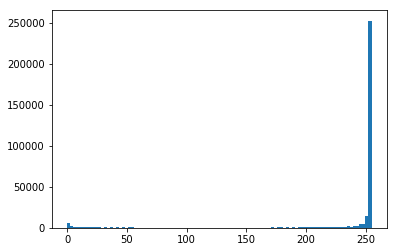

In [6]:
imgutils.histogram(img_obj.working_arr, bins=51)

In [187]:
chunks = imgutils.get_chunk_indexes(img_obj.working_arr.shape, (11,11), offset_row_col=(11,11))

In [188]:
pieces = []
for ch in chunks:
    i = img_obj.working_arr[ch[0]:ch[1],ch[2]:ch[3]].copy()
    y = img_obj.ground_truth[ch[0]:ch[1],ch[2]:ch[3]].copy()
#     break
    scores, thr = get_best_f1_thr(i, y, for_best='F1')
#     print(scores['F1'], thr)
    if ~np.isin(255, y):
        thr = 255
    i[i > thr] = 255
    i[i <= thr] = 0
#     if ~np.isin(1, i):
#         i = 0
    print(thr, scores['F1'], ch)
    pieces.append(i)
#     print(scores['F1'], thr)

255 0.0 [0, 11, 0, 11]
255 0.0 [0, 11, 11, 22]
255 0.0 [0, 11, 22, 33]
255 0.0 [0, 11, 33, 44]
255 0.0 [0, 11, 44, 55]
255 0.0 [0, 11, 55, 66]
255 0.0 [0, 11, 66, 77]
255 0.0 [0, 11, 77, 88]
255 0.0 [0, 11, 88, 99]
255 0.0 [0, 11, 99, 110]
255 0.0 [0, 11, 110, 121]
255 0.0 [0, 11, 121, 132]
255 0.0 [0, 11, 132, 143]
255 0.0 [0, 11, 143, 154]
255 0.0 [0, 11, 154, 165]
255 0.0 [0, 11, 165, 176]
255 0.0 [0, 11, 176, 187]
255 0.0 [0, 11, 187, 198]
255 0.0 [0, 11, 198, 209]
255 0.0 [0, 11, 209, 220]
255 0.0 [0, 11, 220, 231]
255 0.0 [0, 11, 231, 242]
255 0.0 [0, 11, 242, 253]
255 0.0 [0, 11, 253, 264]
255 0.0 [0, 11, 264, 275]
255 0.0 [0, 11, 275, 286]
255 0.0 [0, 11, 286, 297]
255 0.0 [0, 11, 297, 308]
255 0.0 [0, 11, 308, 319]
255 0.0 [0, 11, 319, 330]
255 0.0 [0, 11, 330, 341]
255 0.0 [0, 11, 341, 352]
255 0.0 [0, 11, 352, 363]
255 0.0 [0, 11, 363, 374]
255 0.0 [0, 11, 374, 385]
255 0.0 [0, 11, 385, 396]
255 0.0 [0, 11, 396, 407]
255 0.0 [0, 11, 407, 418]
255 0.0 [0, 11, 418, 429]
255 0.

255 0.0 [55, 66, 396, 407]
255 0.0 [55, 66, 407, 418]
255 0.0 [55, 66, 418, 429]
255 0.0 [55, 66, 429, 440]
255 0.0 [55, 66, 440, 451]
255 0.0 [55, 66, 451, 462]
255 0.0 [55, 66, 462, 473]
255 0.0 [55, 66, 473, 484]
255 0.0 [55, 66, 484, 495]
255 0.0 [55, 66, 495, 506]
255 0.0 [55, 66, 506, 517]
255 0.0 [55, 66, 517, 528]
255 0.0 [55, 66, 528, 539]
255 0.0 [55, 66, 539, 550]
255 0.0 [55, 66, 550, 561]
255 0.0 [55, 66, 554, 565]
255 0.0 [66, 77, 0, 11]
255 0.0 [66, 77, 11, 22]
255 0.0 [66, 77, 22, 33]
255 0.0 [66, 77, 33, 44]
255 0.0 [66, 77, 44, 55]
255 0.0 [66, 77, 55, 66]
255 0.0 [66, 77, 66, 77]
255 0.0 [66, 77, 77, 88]
255 0.0 [66, 77, 88, 99]
255 0.0 [66, 77, 99, 110]
255 0.0 [66, 77, 110, 121]
255 0.0 [66, 77, 121, 132]
1.0 0.5 [66, 77, 132, 143]
218.0 0.9382716049382717 [66, 77, 143, 154]
156.0 0.968421052631579 [66, 77, 154, 165]
161.0 1.0 [66, 77, 165, 176]
196.0 0.9069767441860465 [66, 77, 176, 187]
188.0 0.9795918367346939 [66, 77, 187, 198]
186.0 1.0 [66, 77, 198, 209]
255 

255 0.0 [110, 121, 462, 473]
255 0.0 [110, 121, 473, 484]
255 0.0 [110, 121, 484, 495]
255 0.0 [110, 121, 495, 506]
255 0.0 [110, 121, 506, 517]
255 0.0 [110, 121, 517, 528]
255 0.0 [110, 121, 528, 539]
255 0.0 [110, 121, 539, 550]
255 0.0 [110, 121, 550, 561]
255 0.0 [110, 121, 554, 565]
255 0.0 [121, 132, 0, 11]
255 0.0 [121, 132, 11, 22]
255 0.0 [121, 132, 22, 33]
255 0.0 [121, 132, 33, 44]
255 0.0 [121, 132, 44, 55]
255 0.0 [121, 132, 55, 66]
255 0.0 [121, 132, 66, 77]
158.0 0.90625 [121, 132, 77, 88]
173.0 1.0 [121, 132, 88, 99]
255 0.0 [121, 132, 99, 110]
255 0.0 [121, 132, 110, 121]
255 0.0 [121, 132, 121, 132]
210.0 0.967741935483871 [121, 132, 132, 143]
194.0 0.9387755102040817 [121, 132, 143, 154]
140.0 0.8181818181818181 [121, 132, 154, 165]
255 0.0 [121, 132, 165, 176]
49.0 0.33333333333333337 [121, 132, 176, 187]
255 0.0 [121, 132, 187, 198]
255 0.0 [121, 132, 198, 209]
255 0.0 [121, 132, 209, 220]
255 0.0 [121, 132, 220, 231]
255 0.0 [121, 132, 231, 242]
183.0 0.965517241

131.0 0.8421052631578948 [165, 176, 308, 319]
255 0.0 [165, 176, 319, 330]
255 0.0 [165, 176, 330, 341]
147.0 0.8333333333333333 [165, 176, 341, 352]
255 0.0 [165, 176, 352, 363]
255 0.0 [165, 176, 363, 374]
255 0.0 [165, 176, 374, 385]
155.0 0.9375 [165, 176, 385, 396]
103.0 0.8679245283018869 [165, 176, 396, 407]
161.0 0.9696969696969697 [165, 176, 407, 418]
185.0 0.9411764705882352 [165, 176, 418, 429]
177.0 0.9875 [165, 176, 429, 440]
119.0 0.9380530973451328 [165, 176, 440, 451]
149.0 0.8181818181818182 [165, 176, 451, 462]
186.0 0.9696969696969697 [165, 176, 462, 473]
255 0.0 [165, 176, 473, 484]
255 0.0 [165, 176, 484, 495]
255 0.0 [165, 176, 495, 506]
68.0 0.8125000000000001 [165, 176, 506, 517]
255 0.0 [165, 176, 517, 528]
255 0.0 [165, 176, 528, 539]
255 0.0 [165, 176, 539, 550]
255 0.0 [165, 176, 550, 561]
255 0.0 [165, 176, 554, 565]
255 0.0 [176, 187, 0, 11]
255 0.0 [176, 187, 11, 22]
255 0.0 [176, 187, 22, 33]
255 0.0 [176, 187, 33, 44]
255 0.0 [176, 187, 44, 55]
255 0.0 

255 0.0 [209, 220, 550, 561]
255 0.0 [209, 220, 554, 565]
255 0.0 [220, 231, 0, 11]
255 0.0 [220, 231, 11, 22]
76.0 0.7777777777777777 [220, 231, 22, 33]
71.0 0.7599999999999999 [220, 231, 33, 44]
151.0 0.9444444444444444 [220, 231, 44, 55]
255 0.0 [220, 231, 55, 66]
32.0 0.4444444444444445 [220, 231, 66, 77]
87.0 0.9090909090909091 [220, 231, 77, 88]
255 0.0 [220, 231, 88, 99]
255 0.0 [220, 231, 99, 110]
188.0 0.9152542372881356 [220, 231, 110, 121]
255 0.0 [220, 231, 121, 132]
219.0 0.9846153846153847 [220, 231, 132, 143]
255 0.0 [220, 231, 143, 154]
255 0.0 [220, 231, 154, 165]
255 0.0 [220, 231, 165, 176]
98.0 1.0 [220, 231, 176, 187]
180.0 0.9333333333333333 [220, 231, 187, 198]
119.0 1.0 [220, 231, 198, 209]
201.0 0.8857142857142857 [220, 231, 209, 220]
134.0 1.0 [220, 231, 220, 231]
129.0 1.0 [220, 231, 231, 242]
155.0 0.9824561403508771 [220, 231, 242, 253]
255 0.0 [220, 231, 253, 264]
255 0.0 [220, 231, 264, 275]
255 0.0 [220, 231, 275, 286]
255 0.0 [220, 231, 286, 297]
98.0 0

137.0 0.6470588235294118 [264, 275, 220, 231]
255 0.0 [264, 275, 231, 242]
118.0 0.4444444444444445 [264, 275, 242, 253]
137.0 0.7500000000000001 [264, 275, 253, 264]
181.0 0.9444444444444444 [264, 275, 264, 275]
255 0.0 [264, 275, 275, 286]
113.0 0.8 [264, 275, 286, 297]
160.0 1.0 [264, 275, 297, 308]
137.0 0.888888888888889 [264, 275, 308, 319]
58.0 0.5 [264, 275, 319, 330]
33.0 0.5090909090909091 [264, 275, 330, 341]
64.0 0.19999999999999998 [264, 275, 341, 352]
255 0.0 [264, 275, 352, 363]
255 0.0 [264, 275, 363, 374]
255 0.0 [264, 275, 374, 385]
80.0 0.8571428571428571 [264, 275, 385, 396]
92.0 0.8666666666666666 [264, 275, 396, 407]
255 0.0 [264, 275, 407, 418]
255 0.0 [264, 275, 418, 429]
164.0 0.6666666666666667 [264, 275, 429, 440]
80.0 0.30434782608695654 [264, 275, 440, 451]
15.0 0.6666666666666666 [264, 275, 451, 462]
47.0 0.3333333333333333 [264, 275, 462, 473]
255 0.0 [264, 275, 473, 484]
170.0 0.9664429530201343 [264, 275, 484, 495]
116.0 0.9701492537313433 [264, 275, 49

124.0 0.923076923076923 [319, 330, 198, 209]
197.0 0.9302325581395349 [319, 330, 209, 220]
81.0 1.0 [319, 330, 220, 231]
157.0 0.896551724137931 [319, 330, 231, 242]
169.0 0.9 [319, 330, 242, 253]
255 0.0 [319, 330, 253, 264]
255 0.0 [319, 330, 264, 275]
152.0 0.631578947368421 [319, 330, 275, 286]
255 0.0 [319, 330, 286, 297]
255 0.0 [319, 330, 297, 308]
255 0.0 [319, 330, 308, 319]
142.0 0.7826086956521738 [319, 330, 319, 330]
167.0 0.8936170212765957 [319, 330, 330, 341]
162.0 0.7936507936507936 [319, 330, 341, 352]
255 0.0 [319, 330, 352, 363]
255 0.0 [319, 330, 363, 374]
255 0.0 [319, 330, 374, 385]
255 0.0 [319, 330, 385, 396]
255 0.0 [319, 330, 396, 407]
194.0 0.6666666666666666 [319, 330, 407, 418]
167.0 0.9852941176470589 [319, 330, 418, 429]
134.0 0.9333333333333333 [319, 330, 429, 440]
255 0.0 [319, 330, 440, 451]
255 0.0 [319, 330, 451, 462]
90.0 1.0 [319, 330, 462, 473]
200.0 0.9420289855072465 [319, 330, 473, 484]
203.0 0.8987341772151899 [319, 330, 484, 495]
255 0.0 [319

255 0.0 [363, 374, 517, 528]
196.0 0.8351648351648352 [363, 374, 528, 539]
0.0 0.0 [363, 374, 539, 550]
255 0.0 [363, 374, 550, 561]
255 0.0 [363, 374, 554, 565]
255 0.0 [374, 385, 0, 11]
255 0.0 [374, 385, 11, 22]
255 0.0 [374, 385, 22, 33]
255 0.0 [374, 385, 33, 44]
255 0.0 [374, 385, 44, 55]
255 0.0 [374, 385, 55, 66]
255 0.0 [374, 385, 66, 77]
6.0 0.3478260869565218 [374, 385, 77, 88]
255 0.0 [374, 385, 88, 99]
47.0 0.8421052631578948 [374, 385, 99, 110]
29.0 0.9500000000000001 [374, 385, 110, 121]
255 0.0 [374, 385, 121, 132]
172.0 0.8749999999999999 [374, 385, 132, 143]
255 0.0 [374, 385, 143, 154]
3.0 0.5348837209302325 [374, 385, 154, 165]
75.0 0.8 [374, 385, 165, 176]
192.0 0.96875 [374, 385, 176, 187]
176.0 0.9885057471264368 [374, 385, 187, 198]
155.0 1.0 [374, 385, 198, 209]
60.0 0.923076923076923 [374, 385, 209, 220]
255 0.0 [374, 385, 220, 231]
255 0.0 [374, 385, 231, 242]
255 0.0 [374, 385, 242, 253]
28.0 0.5714285714285715 [374, 385, 253, 264]
156.0 0.8000000000000002 [

130.0 0.6666666666666666 [418, 429, 407, 418]
161.0 0.8749999999999999 [418, 429, 418, 429]
177.0 0.9615384615384616 [418, 429, 429, 440]
255 0.0 [418, 429, 440, 451]
255 0.0 [418, 429, 451, 462]
152.0 1.0 [418, 429, 462, 473]
194.0 1.0 [418, 429, 473, 484]
255 0.0 [418, 429, 484, 495]
255 0.0 [418, 429, 495, 506]
255 0.0 [418, 429, 506, 517]
255 0.0 [418, 429, 517, 528]
255 0.0 [418, 429, 528, 539]
255 0.0 [418, 429, 539, 550]
255 0.0 [418, 429, 550, 561]
255 0.0 [418, 429, 554, 565]
255 0.0 [429, 440, 0, 11]
255 0.0 [429, 440, 11, 22]
255 0.0 [429, 440, 22, 33]
255 0.0 [429, 440, 33, 44]
32.0 0.8000000000000002 [429, 440, 44, 55]
39.0 0.8064516129032258 [429, 440, 55, 66]
41.0 0.9333333333333333 [429, 440, 66, 77]
93.0 0.9354838709677419 [429, 440, 77, 88]
82.0 0.9473684210526316 [429, 440, 88, 99]
113.0 0.9375 [429, 440, 99, 110]
131.0 1.0 [429, 440, 110, 121]
255 0.0 [429, 440, 121, 132]
255 0.0 [429, 440, 132, 143]
136.0 0.9354838709677419 [429, 440, 143, 154]
128.0 0.933333333333

218.0 0.961038961038961 [473, 484, 286, 297]
178.0 1.0 [473, 484, 297, 308]
183.0 0.9696969696969696 [473, 484, 308, 319]
84.0 0.9761904761904763 [473, 484, 319, 330]
90.0 0.9508196721311475 [473, 484, 330, 341]
158.0 0.9803921568627451 [473, 484, 341, 352]
155.0 0.9541284403669724 [473, 484, 352, 363]
117.0 0.9777777777777777 [473, 484, 363, 374]
166.0 1.0 [473, 484, 374, 385]
163.0 0.9915966386554621 [473, 484, 385, 396]
161.0 1.0 [473, 484, 396, 407]
201.0 0.9504950495049505 [473, 484, 407, 418]
255 0.0 [473, 484, 418, 429]
255 0.0 [473, 484, 429, 440]
255 0.0 [473, 484, 440, 451]
163.0 1.0 [473, 484, 451, 462]
167.0 0.9245283018867925 [473, 484, 462, 473]
202.0 0.6666666666666666 [473, 484, 473, 484]
255 0.0 [473, 484, 484, 495]
255 0.0 [473, 484, 495, 506]
255 0.0 [473, 484, 506, 517]
255 0.0 [473, 484, 517, 528]
255 0.0 [473, 484, 528, 539]
255 0.0 [473, 484, 539, 550]
255 0.0 [473, 484, 550, 561]
255 0.0 [473, 484, 554, 565]
255 0.0 [484, 495, 0, 11]
255 0.0 [484, 495, 11, 22]
2

255 0.0 [528, 539, 554, 565]
255 0.0 [539, 550, 0, 11]
255 0.0 [539, 550, 11, 22]
255 0.0 [539, 550, 22, 33]
255 0.0 [539, 550, 33, 44]
255 0.0 [539, 550, 44, 55]
255 0.0 [539, 550, 55, 66]
255 0.0 [539, 550, 66, 77]
255 0.0 [539, 550, 77, 88]
255 0.0 [539, 550, 88, 99]
255 0.0 [539, 550, 99, 110]
255 0.0 [539, 550, 110, 121]
255 0.0 [539, 550, 121, 132]
255 0.0 [539, 550, 132, 143]
255 0.0 [539, 550, 143, 154]
255 0.0 [539, 550, 154, 165]
255 0.0 [539, 550, 165, 176]
255 0.0 [539, 550, 176, 187]
255 0.0 [539, 550, 187, 198]
117.0 0.9199999999999999 [539, 550, 198, 209]
199.0 0.9629629629629629 [539, 550, 209, 220]
255 0.0 [539, 550, 220, 231]
255 0.0 [539, 550, 231, 242]
255 0.0 [539, 550, 242, 253]
255 0.0 [539, 550, 253, 264]
163.0 0.7659574468085106 [539, 550, 264, 275]
255 0.0 [539, 550, 275, 286]
255 0.0 [539, 550, 286, 297]
255 0.0 [539, 550, 297, 308]
255 0.0 [539, 550, 308, 319]
255 0.0 [539, 550, 319, 330]
199.0 0.9705882352941176 [539, 550, 330, 341]
255 0.0 [539, 550, 341, 

In [189]:
pieces = np.array(pieces)
m=imgutils.merge_patches(pieces, img_obj.working_arr.shape, (11,11), (11,11))

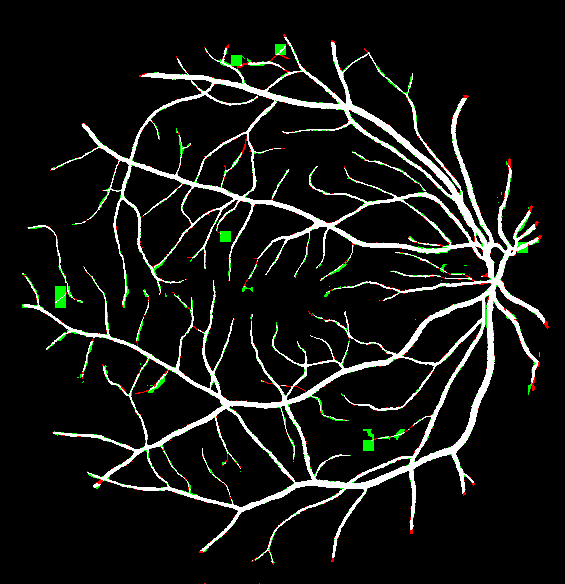

In [190]:
IMG.fromarray(imgutils.get_rgb_scores(m, img_obj.ground_truth))

In [171]:
k=img_obj.working_arr[66:77, 132:143].copy()
ky = img_obj.ground_truth[66:77, 132:143].copy()
IMG.fromarray(k)

In [182]:
np.unique(k, return_counts=True)

(array([  0, 255], dtype=uint8), array([118,   3]))

In [183]:
np.unique(ky, return_counts=True)

(array([  0, 255], dtype=uint8), array([112,   9]))

In [181]:
IMG.fromarray(k)

In [179]:
k[k>1] = 255
k[k<=1] = 0

In [191]:
get_best_f1_thr(k, ky)

({'Accuracy': 0.9504132231404959,
  'F1': 0.5,
  'Precision': 1.0,
  'Recall': 0.3333333333333333},
 1.0)

In [192]:
imgutils.get_praf1(m,img_obj.ground_truth)

{'Accuracy': 0.9837768214329009,
 'F1': 0.9059705949516064,
 'Precision': 0.872454157926788,
 'Recall': 0.9421650652150085}

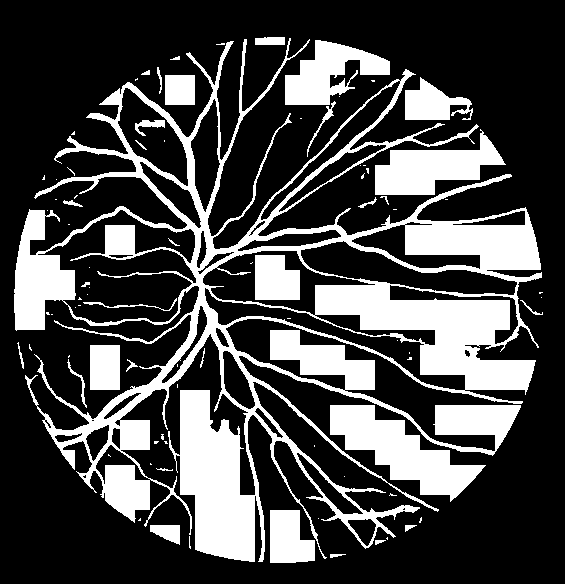

In [29]:
IMG.fromarray(m)

In [11]:
import math as mth
def get_cost(p, q):
    i_diff = max(p, q)
    cost = mth.pow(mth.e, 5 * (i_diff / 255))
#     print(cost)
    return round(cost, 3)
d4 = []
dgt = []
cmap=[]
img = img_obj.image_arr[:,:,1]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        point = []
#         for x in range(img.shape[0]):
#             for y in range(img.shape[1]):
#                 if gt[x,y] ==0:
#                     continue
#                 point.append(get_cost(img[i, j], gt[x, y]))
        if img_obj.ground_truth[i,j]==255:
            dgt.append([i, j, 1.0*img[i, j] + 0.0*img_obj.res['orig'][i,j]])
            d4.append([0, 0, 0])
        else:
            d4.append([i, j, 1.0*img[i, j] + 0.0*img_obj.res['orig'][i,j]])
            dgt.append([0, 0, 0])
        cmap.append(0 if img_obj.ground_truth[i,j]==255 else img[i,j])
parr = np.array(d4)
pdgt = np.array(dgt)
# mean=np.mean(parr, axis=0, keepdims=True)
# std=np.std(parr,axis=0,keepdims=True)
# parrz = (parr-mean)/std
# parrz = parr

In [11]:
rgb = imgutils.get_rgb_scores(255-img_obj.working_arr, img_obj.ground_truth)

In [76]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# plt.rcParams["figure.figsize"] = [24,34]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = parr[:,0]
# y = parr[:,1]
# z = parr[:,2]
# # c = parr[:,3]
# ax.scatter(y, x, z, c=z, cmap='gray', depthshade=False, s=2)
# ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# ax.grid(True, axis='z')
# # ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
# plt.show()

In [77]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# plt.rcParams["figure.figsize"] = [24,34]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = parr[:,0]
# y = parr[:,1]
# z = parr[:,2]
# # c = parr[:,3]
# ax.scatter(y, x, z, c=z, cmap='gray', depthshade=False, s=2)
# ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# ax.grid(True, axis='z')
# # ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
# plt.show()

In [78]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# plt.rcParams["figure.figsize"] = [24,32]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = parr[:,0]
# y = parr[:,1]
# z = parr[:,2]
# # c = parr[:,3]
# ax.scatter(x, y, z, c=z, cmap='gray', depthshade=False, s=2)
# ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# # ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
# plt.show()

In [79]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# plt.rcParams["figure.figsize"] = [24,32]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = parr[:,0]
# y = parr[:,1]
# z = parr[:,2]
# # c = parr[:,3]
# ax.scatter(x, y, z, c=z, cmap='gray', depthshade=False, s=2)
# ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# # ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
# plt.show()

In [17]:
i1 = imgutils.get_rgb_scores(thr, img_obj.ground_truth)

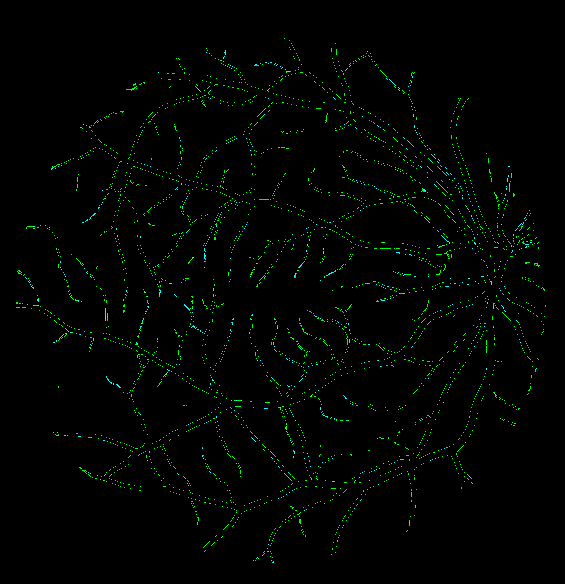

In [18]:
# IMG.fromarray(imgutils.get_rgb_scores(255-thr, img_obj.ground_truth))
IMG.fromarray(i1-i2)

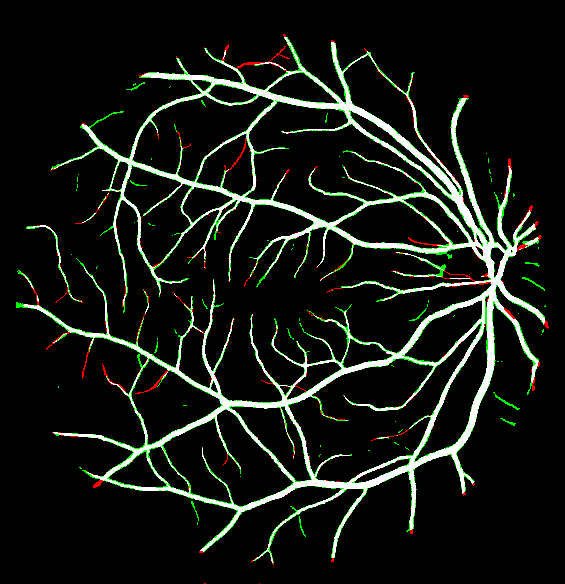

In [11]:
IMG.fromarray(imgutils.get_rgb_scores(thr, img_obj.ground_truth))

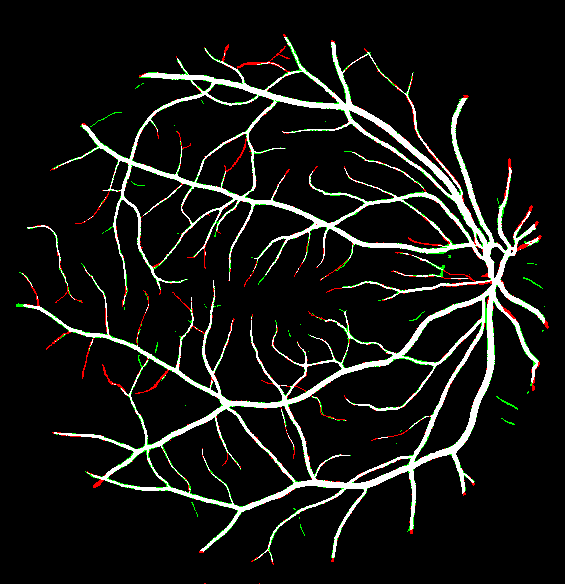

In [19]:
IMG.fromarray(i2)

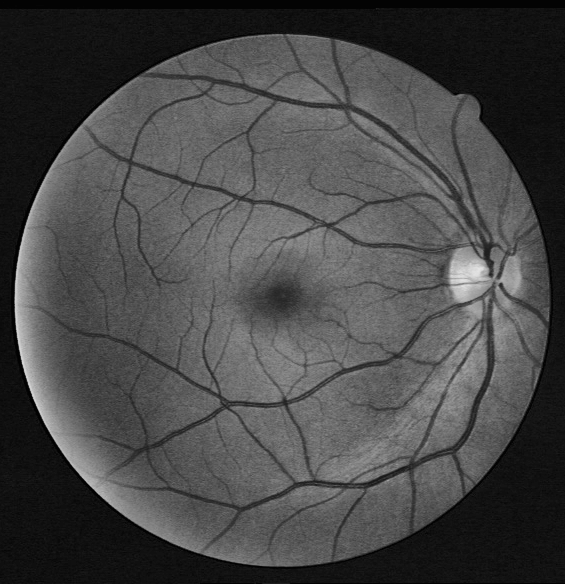

In [24]:
IMG.fromarray(img_obj.res['orig'])

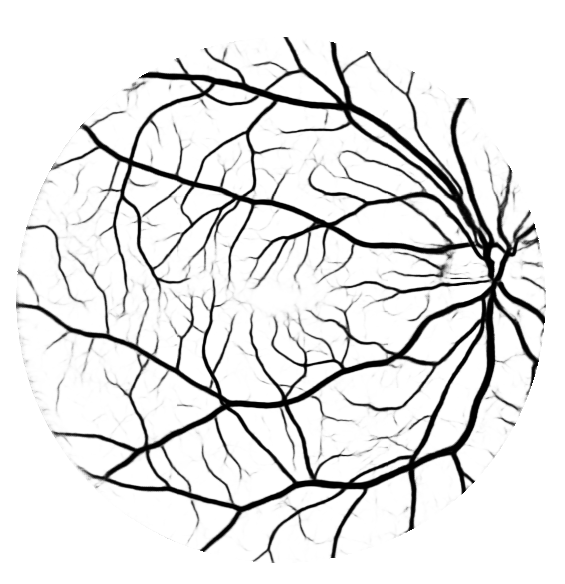

In [21]:
# img_obj.working_arr[img_obj.mask == 0] = 255
IMG.fromarray(img_obj.working_arr)

In [ ]:
imgutils.histogram(img_obj.working_arr)

In [ ]:
res = cv2.resize(img_obj.image_arr, dsize=(900, 900), interpolation=cv2.INTER_AREA)

In [88]:
ii = img[240:255,300:315]

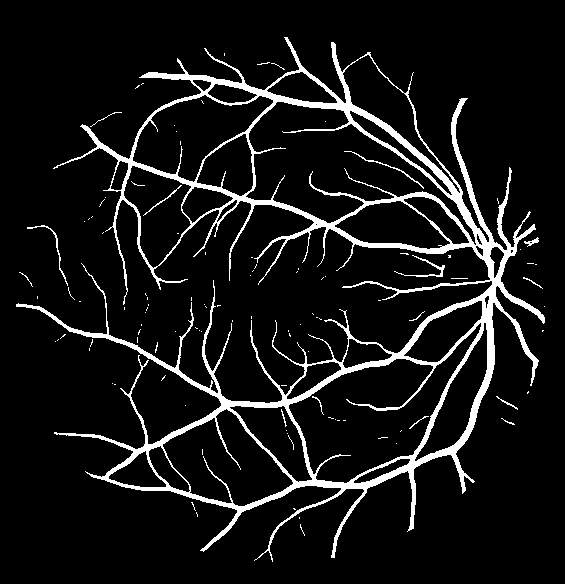

In [101]:
IMG.fromarray(255-thr)

In [3]:
a = torch.randn(2,5,5)

In [4]:
t = torch.randn(2)

In [73]:
b = torch.clamp(a, 0.152, 0.1)

In [9]:
a

tensor([[[-1.3357,  0.1261, -0.4224, -1.0486,  0.0851],
         [-0.5671, -0.2581,  0.5225,  1.1217,  1.2805],
         [ 0.4107, -0.2139,  0.5511,  0.0127,  0.1249],
         [ 0.1681,  0.7915,  0.2330,  1.2817,  1.3734],
         [-0.1920,  0.4462, -0.0076, -0.3988, -0.8037]],

        [[-0.7851,  1.9235, -0.4782, -0.9785, -0.3925],
         [ 0.2065,  0.0082, -0.1045, -0.1571,  0.7879],
         [-0.5762, -0.9835, -0.3025, -0.4001, -0.2554],
         [-1.7228,  0.5509, -1.4917,  0.0847, -0.3327],
         [ 1.2905, -0.0366, -0.0550,  0.0380,  0.1556]]])

In [11]:
t

tensor([-0.9744,  0.8910])

RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 2

In [39]:
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = F.nll_loss(F.log_softmax(input), target)
output.backward()

/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [38]:
import torch.nn.functional as F

In [43]:
F.log_softmax(input).shape

/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


torch.Size([3, 5])